In [ ]:
import torch
print(torch.cuda.is_available())  # Should return True


True


In [ ]:
import torch
print(torch.cuda.is_available())  # Should return True


True


In [ ]:
!pip install ultralytics roboflow opencv-python torch torchvision


In [ ]:
!pip install roboflow


In [ ]:
from roboflow import Roboflow

rf = Roboflow(api_key="u8ThYOjhnuknXQ3c9Hmd")  # Your API key
project = rf.workspace("girl").project("face_mask-1nzx0")
version = project.version(1)
dataset = version.download("yolov8")


loading Roboflow workspace...
loading Roboflow project...


In [ ]:
import os
print(os.listdir())  # Lists all files and folders in the current directory


['.config', 'face_mask-1', 'yolov8n.pt', 'Screenshot 2025-02-16 085339.png', 'Screenshot 2025-02-16 085626.png', 'yolo11n.pt', 'Screenshot 2025-02-16 082404.png', 'runs', 'WhatsApp Image 2025-02-16 at 09.43.41_4e3912e0.jpg', 'Screenshot 2025-02-16 082330.png', 'sample_data']


In [ ]:
import os
print(os.listdir("face_mask-1"))  # Lists files inside the dataset folder


['train', 'valid', 'test', 'README.dataset.txt', 'data.yaml', 'README.roboflow.txt']


In [ ]:
with open("face_mask-1/data.yaml", "r") as f:
    print(f.read())


names:
- face_mask
nc: 1
roboflow:
  license: CC BY 4.0
  project: face_mask-1nzx0
  url: https://universe.roboflow.com/girl/face_mask-1nzx0/dataset/1
  version: 1
  workspace: girl
test: /content/face_mask-1/test/images
train: /content/face_mask-1/train/images
val: /content/face_mask-1/valid/images



In [ ]:
data_yaml = """names:
- face_mask
nc: 1
roboflow:
  license: CC BY 4.0
  project: face_mask-1nzx0
  url: https://universe.roboflow.com/girl/face_mask-1nzx0/dataset/1
  version: 1
  workspace: girl
test: face_mask-1/test/images
train: face_mask-1/train/images
val: face_mask-1/valid/images
"""

with open("face_mask-1/data.yaml", "w") as f:
    f.write(data_yaml)

print("Dataset paths updated successfully!")


Dataset paths updated successfully!


In [ ]:
import os
print(os.listdir("/content/face_mask-1"))  # This should contain 'train', 'valid', 'test'


['train', 'valid', 'test', 'README.dataset.txt', 'data.yaml', 'README.roboflow.txt']


In [ ]:
data_yaml = """names:
- face_mask
nc: 1
roboflow:
  license: CC BY 4.0
  project: face_mask-1nzx0
  url: https://universe.roboflow.com/girl/face_mask-1nzx0/dataset/1
  version: 1
  workspace: girl
test: /content/face_mask-1/test/images
train: /content/face_mask-1/train/images
val: /content/face_mask-1/valid/images
"""

with open("/content/face_mask-1/data.yaml", "w") as f:
    f.write(data_yaml)

print("Dataset paths updated successfully!")


Dataset paths updated successfully!


In [ ]:
!nvidia-smi



Sun Feb 16 04:27:46 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   49C    P8             12W /   70W |       2MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
from ultralytics import YOLO

# Load YOLOv8 model
model = YOLO("yolov8n.pt")

# Train the model
model.train(data="/content/face_mask-1/data.yaml", epochs=50, imgsz=640)


Ultralytics 8.3.75 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/face_mask-1/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train4, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_

train: Scanning /content/face_mask-1/train/labels.cache... 351 images, 0 backgrounds, 0 corrupt: 100%|██████████| 351/351 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/face_mask-1/valid/labels.cache... 20 images, 0 backgrounds, 0 corrupt: 100%|██████████| 20/20 [00:00<?, ?it/s]


Plotting labels to runs/detect/train4/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train4
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      2.17G      1.277      2.829      1.527         42        640: 100%|██████████| 22/22 [00:07<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.63it/s]

                   all         20         23    0.00383          1      0.473      0.333



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      2.23G      1.208      1.666      1.356         29        640: 100%|██████████| 22/22 [00:05<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.98it/s]

                   all         20         23          1      0.244      0.727      0.567



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      2.22G      1.247      1.571      1.392         32        640: 100%|██████████| 22/22 [00:05<00:00,  3.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.13it/s]

                   all         20         23      0.866       0.87      0.902      0.642



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      2.15G      1.177      1.466      1.341         32        640: 100%|██████████| 22/22 [00:05<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.47it/s]

                   all         20         23      0.954      0.903      0.983      0.747



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      2.14G      1.176      1.338       1.37         26        640: 100%|██████████| 22/22 [00:06<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.97it/s]

                   all         20         23       0.88          1      0.981       0.75



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      2.14G      1.188      1.317      1.371         32        640: 100%|██████████| 22/22 [00:05<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.60it/s]

                   all         20         23      0.708      0.842       0.83      0.607



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      2.15G      1.159      1.266      1.356         32        640: 100%|██████████| 22/22 [00:06<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.26it/s]

                   all         20         23      0.867      0.852       0.91      0.728



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      2.15G       1.15      1.167      1.349         39        640: 100%|██████████| 22/22 [00:05<00:00,  3.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.77it/s]

                   all         20         23        0.5      0.826      0.677      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      2.14G      1.157      1.139       1.34         33        640: 100%|██████████| 22/22 [00:06<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.38it/s]

                   all         20         23      0.955      0.932      0.986      0.753



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      2.15G      1.125       1.05      1.312         47        640: 100%|██████████| 22/22 [00:05<00:00,  4.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.59it/s]

                   all         20         23      0.983          1      0.995      0.719



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      2.15G      1.067     0.9319      1.242         32        640: 100%|██████████| 22/22 [00:05<00:00,  3.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.62it/s]

                   all         20         23       0.99          1      0.995      0.819



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      2.14G      1.035     0.9237      1.244         36        640: 100%|██████████| 22/22 [00:05<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.38it/s]

                   all         20         23      0.838      0.957      0.958      0.761



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      2.18G      1.026     0.8941       1.21         32        640: 100%|██████████| 22/22 [00:05<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.52it/s]

                   all         20         23      0.995          1      0.995      0.826



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      2.15G     0.9789     0.8481      1.201         29        640: 100%|██████████| 22/22 [00:06<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.53it/s]

                   all         20         23      0.982          1      0.995      0.818



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      2.15G       1.02     0.8318      1.227         32        640: 100%|██████████| 22/22 [00:05<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.35it/s]

                   all         20         23      0.994          1      0.995      0.801



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      2.14G      0.987     0.8235      1.209         32        640: 100%|██████████| 22/22 [00:06<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.88it/s]

                   all         20         23          1      0.995      0.995      0.806



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      2.14G     0.9548     0.7901       1.21         22        640: 100%|██████████| 22/22 [00:05<00:00,  4.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.13it/s]

                   all         20         23          1      0.997      0.995      0.822



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      2.15G      0.984     0.7701      1.195         37        640: 100%|██████████| 22/22 [00:06<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.90it/s]

                   all         20         23      0.958      0.997      0.993      0.823



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      2.16G     0.9957     0.7907       1.23         30        640: 100%|██████████| 22/22 [00:05<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.78it/s]

                   all         20         23      0.956          1      0.993       0.83



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      2.15G     0.9595     0.7398      1.191         44        640: 100%|██████████| 22/22 [00:06<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.75it/s]

                   all         20         23      0.947          1      0.984      0.807



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      2.15G     0.9104     0.6993      1.158         21        640: 100%|██████████| 22/22 [00:05<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.84it/s]

                   all         20         23      0.993          1      0.995      0.798



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      2.16G      0.947     0.7268      1.171         27        640: 100%|██████████| 22/22 [00:06<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.91it/s]

                   all         20         23      0.996          1      0.995      0.822



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      2.15G     0.9279      0.664      1.186         26        640: 100%|██████████| 22/22 [00:05<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.78it/s]

                   all         20         23      0.972          1      0.995      0.817



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      2.17G     0.9087     0.6733      1.154         34        640: 100%|██████████| 22/22 [00:06<00:00,  3.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.02it/s]

                   all         20         23      0.997          1      0.995      0.806



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      2.14G     0.8713     0.6583      1.128         34        640: 100%|██████████| 22/22 [00:05<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.82it/s]

                   all         20         23      0.985          1      0.995      0.826



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      2.15G     0.8751     0.6525       1.13         43        640: 100%|██████████| 22/22 [00:05<00:00,  3.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.24it/s]

                   all         20         23      0.997          1      0.995      0.858



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      2.16G     0.8467     0.6297      1.102         37        640: 100%|██████████| 22/22 [00:05<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.39it/s]

                   all         20         23      0.998          1      0.995      0.832



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      2.14G     0.8248     0.6306       1.12         35        640: 100%|██████████| 22/22 [00:05<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.66it/s]

                   all         20         23      0.997          1      0.995       0.78



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      2.14G     0.8357     0.6182      1.103         27        640: 100%|██████████| 22/22 [00:06<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.50it/s]

                   all         20         23      0.997          1      0.995      0.768



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      2.15G     0.8335     0.6011      1.101         24        640: 100%|██████████| 22/22 [00:05<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.86it/s]

                   all         20         23      0.992          1      0.995      0.802



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      2.14G     0.7961     0.5972      1.072         28        640: 100%|██████████| 22/22 [00:06<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.40it/s]

                   all         20         23      0.997          1      0.995      0.798



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      2.15G     0.8132     0.5693      1.089         27        640: 100%|██████████| 22/22 [00:05<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.71it/s]

                   all         20         23      0.997          1      0.995      0.796



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      2.14G     0.7733     0.5697       1.07         38        640: 100%|██████████| 22/22 [00:06<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.50it/s]

                   all         20         23      0.958          1      0.995      0.815



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      2.14G     0.7996     0.5651      1.083         37        640: 100%|██████████| 22/22 [00:05<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.41it/s]

                   all         20         23      0.997          1      0.995      0.847



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      2.16G     0.7882     0.5433      1.084         38        640: 100%|██████████| 22/22 [00:06<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.57it/s]

                   all         20         23      0.997          1      0.995      0.804



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      2.14G     0.7716     0.5448      1.076         34        640: 100%|██████████| 22/22 [00:05<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.63it/s]

                   all         20         23      0.996          1      0.995      0.816



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      2.16G     0.7542     0.5122      1.057         23        640: 100%|██████████| 22/22 [00:06<00:00,  3.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.55it/s]

                   all         20         23      0.997          1      0.995      0.823



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      2.15G     0.7467     0.5094      1.055         30        640: 100%|██████████| 22/22 [00:05<00:00,  3.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.54it/s]

                   all         20         23      0.997          1      0.995      0.805



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      2.14G     0.7115     0.4868      1.034         34        640: 100%|██████████| 22/22 [00:05<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.89it/s]

                   all         20         23      0.997          1      0.995      0.818



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      2.14G     0.7181     0.4783       1.04         27        640: 100%|██████████| 22/22 [00:06<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.06it/s]

                   all         20         23      0.997          1      0.995      0.836


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      2.14G     0.6068     0.4132     0.9674         15        640: 100%|██████████| 22/22 [00:06<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.84it/s]

                   all         20         23          1          1      0.995       0.82



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      2.14G     0.6076     0.4031     0.9572         17        640: 100%|██████████| 22/22 [00:06<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.90it/s]

                   all         20         23      0.997          1      0.995      0.827



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      2.14G     0.6093     0.3972     0.9705         19        640: 100%|██████████| 22/22 [00:05<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.35it/s]

                   all         20         23      0.997          1      0.995      0.813



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      2.14G     0.5846     0.3819     0.9657         20        640: 100%|██████████| 22/22 [00:06<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.55it/s]

                   all         20         23      0.998          1      0.995      0.824



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      2.14G     0.5925     0.3882      0.977         23        640: 100%|██████████| 22/22 [00:05<00:00,  4.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.18it/s]

                   all         20         23      0.997          1      0.995      0.813



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      2.14G     0.5555     0.3605     0.9465         17        640: 100%|██████████| 22/22 [00:06<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.27it/s]

                   all         20         23      0.997          1      0.995      0.819



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      2.14G     0.5343     0.3604     0.9457         20        640: 100%|██████████| 22/22 [00:05<00:00,  4.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.20it/s]

                   all         20         23      0.958      0.998      0.992      0.802



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      2.14G     0.5446     0.3521     0.9316         22        640: 100%|██████████| 22/22 [00:05<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.88it/s]

                   all         20         23      0.998          1      0.995       0.81



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      2.14G      0.526     0.3412     0.9253         17        640: 100%|██████████| 22/22 [00:05<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.12it/s]

                   all         20         23      0.998          1      0.995       0.81



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      2.14G     0.5269     0.3428     0.9248         15        640: 100%|██████████| 22/22 [00:05<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.86it/s]

                   all         20         23      0.998          1      0.995      0.799



50 epochs completed in 0.098 hours.
Optimizer stripped from runs/detect/train4/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train4/weights/best.pt, 6.2MB

Validating runs/detect/train4/weights/best.pt...
Ultralytics 8.3.75 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 168 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.66it/s]


                   all         20         23      0.997          1      0.995      0.862
Speed: 0.2ms preprocess, 2.5ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to runs/detect/train4


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7dc0f7c35850>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [ ]:
from ultralytics import YOLO

# Load YOLOv8 model
model = YOLO("yolov8n.pt")

# Start training again
model.train(data="/content/face_mask-1/data.yaml", epochs=50, imgsz=640)


Ultralytics 8.3.75 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/face_mask-1/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train5, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_

train: Scanning /content/face_mask-1/train/labels.cache... 351 images, 0 backgrounds, 0 corrupt: 100%|██████████| 351/351 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/face_mask-1/valid/labels.cache... 20 images, 0 backgrounds, 0 corrupt: 100%|██████████| 20/20 [00:00<?, ?it/s]


Plotting labels to runs/detect/train5/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train5
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      2.32G      1.277      2.829      1.527         42        640: 100%|██████████| 22/22 [00:07<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.68it/s]

                   all         20         23    0.00383          1      0.473      0.333



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      2.17G      1.208      1.666      1.356         29        640: 100%|██████████| 22/22 [00:05<00:00,  3.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.98it/s]

                   all         20         23          1      0.244      0.727      0.567



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      2.15G      1.247      1.571      1.392         32        640: 100%|██████████| 22/22 [00:06<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.37it/s]

                   all         20         23      0.866       0.87      0.902      0.642



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      2.17G      1.177      1.466      1.341         32        640: 100%|██████████| 22/22 [00:05<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.72it/s]

                   all         20         23      0.954      0.903      0.983      0.747



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      2.15G      1.176      1.338       1.37         26        640: 100%|██████████| 22/22 [00:06<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.53it/s]

                   all         20         23       0.88          1      0.981       0.75



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      2.15G      1.188      1.317      1.371         32        640: 100%|██████████| 22/22 [00:05<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.33it/s]

                   all         20         23      0.708      0.842       0.83      0.607



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      2.16G      1.159      1.266      1.356         32        640: 100%|██████████| 22/22 [00:05<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.57it/s]

                   all         20         23      0.867      0.852       0.91      0.728



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      2.16G       1.15      1.167      1.349         39        640: 100%|██████████| 22/22 [00:05<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.04it/s]

                   all         20         23        0.5      0.826      0.677      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      2.15G      1.157      1.139       1.34         33        640: 100%|██████████| 22/22 [00:05<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.22it/s]

                   all         20         23      0.955      0.932      0.986      0.753



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      2.16G      1.125       1.05      1.312         47        640: 100%|██████████| 22/22 [00:06<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.99it/s]

                   all         20         23      0.983          1      0.995      0.719



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      2.16G      1.067     0.9319      1.242         32        640: 100%|██████████| 22/22 [00:05<00:00,  4.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.11it/s]

                   all         20         23       0.99          1      0.995      0.819



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      2.15G      1.035     0.9237      1.244         36        640: 100%|██████████| 22/22 [00:06<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.26it/s]

                   all         20         23      0.838      0.957      0.958      0.761



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      2.19G      1.026     0.8941       1.21         32        640: 100%|██████████| 22/22 [00:05<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.77it/s]

                   all         20         23      0.995          1      0.995      0.826



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      2.16G     0.9789     0.8481      1.201         29        640: 100%|██████████| 22/22 [00:06<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.60it/s]

                   all         20         23      0.982          1      0.995      0.818



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      2.16G       1.02     0.8318      1.227         32        640: 100%|██████████| 22/22 [00:05<00:00,  4.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.81it/s]

                   all         20         23      0.994          1      0.995      0.801



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      2.15G      0.987     0.8235      1.209         32        640: 100%|██████████| 22/22 [00:06<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.65it/s]

                   all         20         23          1      0.995      0.995      0.806



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      2.15G     0.9548     0.7901       1.21         22        640: 100%|██████████| 22/22 [00:05<00:00,  4.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.57it/s]

                   all         20         23          1      0.997      0.995      0.822



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      2.16G      0.984     0.7701      1.195         37        640: 100%|██████████| 22/22 [00:06<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.95it/s]

                   all         20         23      0.958      0.997      0.993      0.823



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      2.17G     0.9957     0.7907       1.23         30        640: 100%|██████████| 22/22 [00:05<00:00,  4.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.33it/s]

                   all         20         23      0.956          1      0.993       0.83



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      2.16G     0.9595     0.7398      1.191         44        640: 100%|██████████| 22/22 [00:05<00:00,  3.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.28it/s]

                   all         20         23      0.947          1      0.984      0.807



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      2.16G     0.9104     0.6993      1.158         21        640: 100%|██████████| 22/22 [00:05<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.05it/s]

                   all         20         23      0.993          1      0.995      0.798



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      2.17G      0.947     0.7268      1.171         27        640: 100%|██████████| 22/22 [00:05<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.56it/s]

                   all         20         23      0.996          1      0.995      0.822



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      2.16G     0.9279      0.664      1.186         26        640: 100%|██████████| 22/22 [00:06<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.01it/s]

                   all         20         23      0.972          1      0.995      0.817



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      2.19G     0.9087     0.6733      1.154         34        640: 100%|██████████| 22/22 [00:05<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.39it/s]

                   all         20         23      0.997          1      0.995      0.806



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      2.15G     0.8713     0.6583      1.128         34        640: 100%|██████████| 22/22 [00:06<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.19it/s]

                   all         20         23      0.985          1      0.995      0.826



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      2.16G     0.8751     0.6525       1.13         43        640: 100%|██████████| 22/22 [00:05<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.41it/s]

                   all         20         23      0.997          1      0.995      0.858



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      2.17G     0.8467     0.6297      1.102         37        640: 100%|██████████| 22/22 [00:06<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.07it/s]

                   all         20         23      0.998          1      0.995      0.832



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      2.15G     0.8248     0.6306       1.12         35        640: 100%|██████████| 22/22 [00:05<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.21it/s]

                   all         20         23      0.997          1      0.995       0.78



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      2.15G     0.8357     0.6182      1.103         27        640: 100%|██████████| 22/22 [00:06<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.70it/s]

                   all         20         23      0.997          1      0.995      0.768



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      2.16G     0.8335     0.6011      1.101         24        640: 100%|██████████| 22/22 [00:05<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.40it/s]

                   all         20         23      0.992          1      0.995      0.802



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      2.15G     0.7961     0.5972      1.072         28        640: 100%|██████████| 22/22 [00:06<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.09it/s]

                   all         20         23      0.997          1      0.995      0.798



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      2.16G     0.8132     0.5693      1.089         27        640: 100%|██████████| 22/22 [00:05<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.79it/s]

                   all         20         23      0.997          1      0.995      0.796



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      2.15G     0.7733     0.5697       1.07         38        640: 100%|██████████| 22/22 [00:06<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.52it/s]

                   all         20         23      0.958          1      0.995      0.815



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      2.15G     0.7996     0.5651      1.083         37        640: 100%|██████████| 22/22 [00:05<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.64it/s]

                   all         20         23      0.997          1      0.995      0.847



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      2.17G     0.7882     0.5433      1.084         38        640: 100%|██████████| 22/22 [00:05<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.09it/s]

                   all         20         23      0.997          1      0.995      0.804



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      2.15G     0.7716     0.5448      1.076         34        640: 100%|██████████| 22/22 [00:06<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.60it/s]

                   all         20         23      0.996          1      0.995      0.816



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      2.17G     0.7542     0.5122      1.057         23        640: 100%|██████████| 22/22 [00:05<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.60it/s]

                   all         20         23      0.997          1      0.995      0.823



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      2.16G     0.7467     0.5094      1.055         30        640: 100%|██████████| 22/22 [00:06<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.09it/s]

                   all         20         23      0.997          1      0.995      0.805



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      2.15G     0.7115     0.4868      1.034         34        640: 100%|██████████| 22/22 [00:05<00:00,  4.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.18it/s]

                   all         20         23      0.997          1      0.995      0.818



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      2.15G     0.7181     0.4783       1.04         27        640: 100%|██████████| 22/22 [00:06<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.55it/s]

                   all         20         23      0.997          1      0.995      0.836


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      2.22G     0.6068     0.4132     0.9674         15        640: 100%|██████████| 22/22 [00:06<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.28it/s]

                   all         20         23          1          1      0.995       0.82



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      2.15G     0.6076     0.4031     0.9572         17        640: 100%|██████████| 22/22 [00:06<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.61it/s]

                   all         20         23      0.997          1      0.995      0.827



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      2.15G     0.6093     0.3972     0.9705         19        640: 100%|██████████| 22/22 [00:04<00:00,  4.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.53it/s]

                   all         20         23      0.997          1      0.995      0.813



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      2.15G     0.5846     0.3819     0.9657         20        640: 100%|██████████| 22/22 [00:06<00:00,  3.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.61it/s]

                   all         20         23      0.998          1      0.995      0.824



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      2.15G     0.5925     0.3882      0.977         23        640: 100%|██████████| 22/22 [00:04<00:00,  4.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.65it/s]

                   all         20         23      0.997          1      0.995      0.813



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      2.15G     0.5555     0.3605     0.9465         17        640: 100%|██████████| 22/22 [00:05<00:00,  3.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.68it/s]

                   all         20         23      0.997          1      0.995      0.819



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      2.15G     0.5343     0.3604     0.9457         20        640: 100%|██████████| 22/22 [00:04<00:00,  4.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.70it/s]

                   all         20         23      0.958      0.998      0.992      0.802



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      2.15G     0.5446     0.3521     0.9316         22        640: 100%|██████████| 22/22 [00:05<00:00,  3.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.51it/s]

                   all         20         23      0.998          1      0.995       0.81



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      2.15G      0.526     0.3412     0.9253         17        640: 100%|██████████| 22/22 [00:05<00:00,  4.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.01it/s]

                   all         20         23      0.998          1      0.995       0.81



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      2.15G     0.5269     0.3428     0.9248         15        640: 100%|██████████| 22/22 [00:05<00:00,  3.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.13it/s]

                   all         20         23      0.998          1      0.995      0.799



50 epochs completed in 0.098 hours.
Optimizer stripped from runs/detect/train5/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train5/weights/best.pt, 6.2MB

Validating runs/detect/train5/weights/best.pt...
Ultralytics 8.3.75 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 168 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.47it/s]


                   all         20         23      0.997          1      0.995      0.862
Speed: 0.2ms preprocess, 2.0ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to runs/detect/train5


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7dc0f6ddd610>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [ ]:
import os
print(os.listdir("runs/detect/train3/weights"))


['last.pt', 'best.pt']


In [ ]:
import os

print(os.listdir("runs/detect/predict"))


['Screenshot 2025-02-16 082330.jpg']


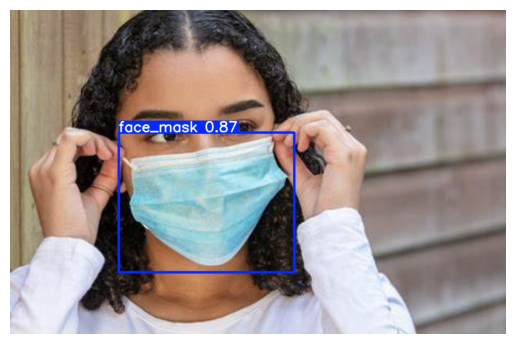

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

# Load and display the detected image
img_path = "runs/detect/predict/Screenshot 2025-02-16 082330.jpg"  # Corrected filename
img = Image.open(img_path)

plt.imshow(img)
plt.axis("off")  # Hide axes
plt.show()


In [ ]:
from ultralytics import YOLO

# Load the trained model
model = YOLO("runs/detect/train3/weights/best.pt")

# Run inference on the new image
results = model("/content/Screenshot 2025-02-16 082404.png", save=True)

# Find the new saved file
import os
print(os.listdir("runs/detect/predict"))  # List files in the prediction folder



image 1/1 /content/Screenshot 2025-02-16 082404.png: 640x480 (no detections), 61.5ms
Speed: 3.6ms preprocess, 61.5ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/detect/predict8
['Screenshot 2025-02-16 082330.jpg']


In [ ]:
from ultralytics import YOLO

# Load the trained model
model = YOLO("runs/detect/train3/weights/best.pt")

# Run inference on the new image
results = model("/content/Screenshot 2025-02-16 085339.png", save=True)

# Check the saved predictions
import os
print(os.listdir("runs/detect/predict2"))



image 1/1 /content/Screenshot 2025-02-16 085339.png: 352x640 (no detections), 54.2ms
Speed: 3.0ms preprocess, 54.2ms inference, 0.7ms postprocess per image at shape (1, 3, 352, 640)
Results saved to runs/detect/predict9
['Screenshot 2025-02-16 082404.jpg']


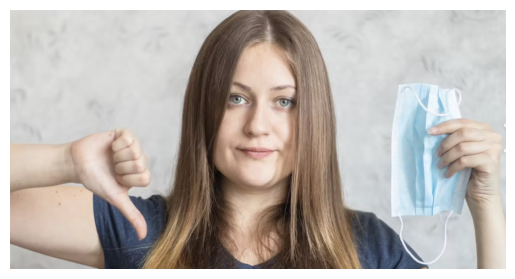

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

# Load and display the image
img_path = "/content/Screenshot 2025-02-16 085339.png"  # Replace with your actual image filename
img = Image.open(img_path)

plt.imshow(img)
plt.axis("off")  # Hide axes
plt.show()


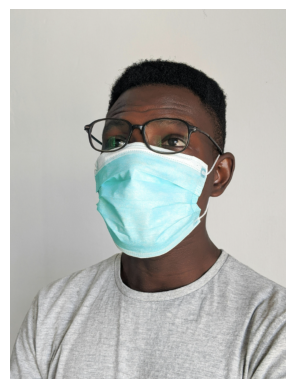

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

# Load and display the image
img_path = "/content/Screenshot 2025-02-16 085626.png"  # Your new image
img = Image.open(img_path)

plt.imshow(img)
plt.axis("off")  # Hide axes
plt.show()


In [ ]:
import os
print(os.listdir("runs/detect/predict4"))  # Check the saved detection filename


['Screenshot 2025-02-16 085626.jpg']


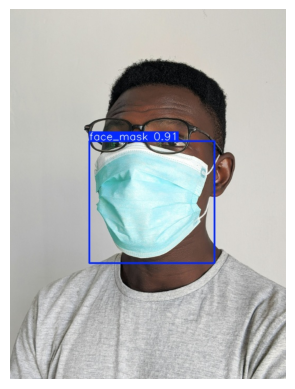

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

# Load and display the detected image
img_path = "runs/detect/predict4/Screenshot 2025-02-16 085626.jpg"
img = Image.open(img_path)

plt.imshow(img)
plt.axis("off")  # Hide axes
plt.show()



image 1/1 /content/Screenshot 2025-02-16 085626.png: 640x480 1 face_mask, 11.8ms
Speed: 4.3ms preprocess, 11.8ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/detect/predict10
✅ Mask Detected


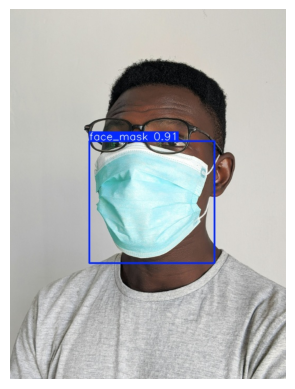

In [ ]:
from ultralytics import YOLO
from PIL import Image
import matplotlib.pyplot as plt

# Load trained model
model = YOLO("runs/detect/train3/weights/best.pt")

# Image path (change to test different images)
img_path = "/content/Screenshot 2025-02-16 085626.png"  # Replace with your test image

# Run inference
results = model(img_path, save=True)

# Check if any objects were detected
if results[0].boxes:
    print("✅ Mask Detected")
    # Show detected image
    detected_img = Image.open(f"runs/detect/predict5/{img_path.split('/')[-1].replace('.png', '.jpg')}")
else:
    print("❌ No Mask Detected - This is an Abnormality")
    detected_img = Image.open(img_path)  # Show original image since no changes

# Display image
plt.imshow(detected_img)
plt.axis("off")
plt.show()



image 1/1 /content/Screenshot 2025-02-16 085339.png: 352x640 (no detections), 12.7ms
Speed: 3.2ms preprocess, 12.7ms inference, 0.9ms postprocess per image at shape (1, 3, 352, 640)
Results saved to runs/detect/predict11
❌ No Mask Detected - This is an Abnormality


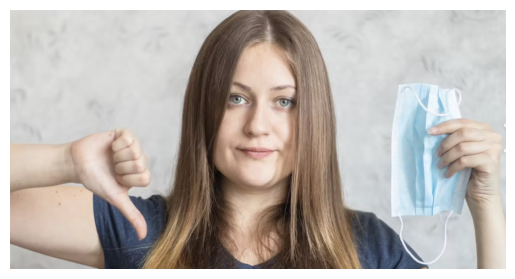

In [ ]:
from ultralytics import YOLO
from PIL import Image
import matplotlib.pyplot as plt

# Load trained model
model = YOLO("runs/detect/train3/weights/best.pt")

# Image path (change to test different images)
img_path = "/content/Screenshot 2025-02-16 085339.png"  # Replace with your test image

# Run inference
results = model(img_path, save=True)

# Check if any objects were detected
if results[0].boxes:
    print("✅ Mask Detected")
    # Show detected image
    detected_img = Image.open(f"runs/detect/predict5/{img_path.split('/')[-1].replace('.png', '.jpg')}")
else:
    print("❌ No Mask Detected - This is an Abnormality")
    detected_img = Image.open(img_path)  # Show original image since no changes

# Display image
plt.imshow(detected_img)
plt.axis("off")
plt.show()



image 1/1 /content/WhatsApp Image 2025-02-16 at 09.43.41_4e3912e0.jpg: 384x640 (no detections), 37.9ms
Speed: 2.0ms preprocess, 37.9ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/detect/predict12
❌ No Mask Detected - This is an Abnormality


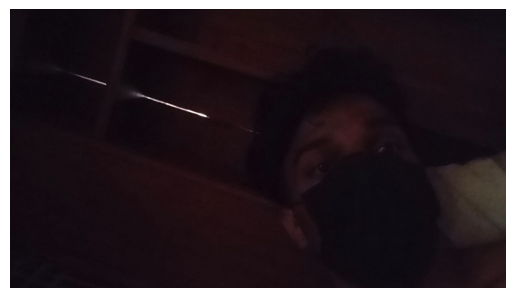

In [ ]:
from ultralytics import YOLO
from PIL import Image
import matplotlib.pyplot as plt

# Load trained model
model = YOLO("runs/detect/train3/weights/best.pt")

# Image path (change to test different images)
img_path = "/content/WhatsApp Image 2025-02-16 at 09.43.41_4e3912e0.jpg"  # Replace with your test image

# Run inference
results = model(img_path, save=True)

# Check if any objects were detected
if results[0].boxes:
    print("✅ Mask Detected")
    # Show detected image
    detected_img = Image.open(f"runs/detect/predict5/{img_path.split('/')[-1].replace('.png', '.jpg')}")
else:
    print("❌ No Mask Detected - This is an Abnormality")
    detected_img = Image.open(img_path)  # Show original image since no changes

# Display image
plt.imshow(detected_img)
plt.axis("off")
plt.show()


In [ ]:
!pip install opencv-python



image 1/1 /content/Screenshot 2025-02-16 085339.png: 352x640 (no detections), 7.3ms
Speed: 1.9ms preprocess, 7.3ms inference, 0.6ms postprocess per image at shape (1, 3, 352, 640)
Results saved to runs/detect/predict13
❌ No Mask Detected - This is an Abnormality


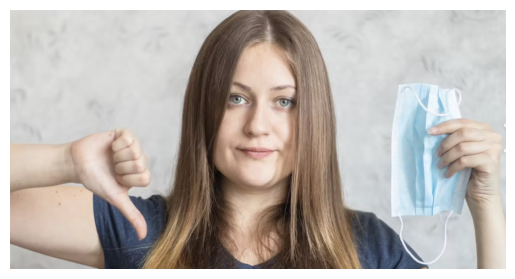

In [ ]:
import cv2
from ultralytics import YOLO
from PIL import Image
import matplotlib.pyplot as plt

# Load trained YOLO model
model = YOLO("runs/detect/train3/weights/best.pt")

# Path to test image
img_path = "/content/Screenshot 2025-02-16 085339.png"  # Replace with actual image

# Run inference
results = model(img_path, save=True)

# Load OpenCV face detector
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

# Load image in OpenCV
image = cv2.imread(img_path)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Detect faces
faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

# If YOLO detects a mask
if results[0].boxes:
    print("✅ Mask Detected")
    detected_img = Image.open(f"runs/detect/predict5/{img_path.split('/')[-1].replace('.png', '.jpg')}")
# If no mask is detected but a face is found
elif len(faces) > 0:
    print("❌ No Mask Detected - This is an Abnormality")
    detected_img = Image.open(img_path)  # Show original image
# If no face is found
else:
    print("⚠ No Person Detected - Ignoring")
    detected_img = Image.open(img_path)  # Show original image

# Display image
plt.imshow(detected_img)
plt.axis("off")
plt.show()



image 1/1 /content/WhatsApp Image 2025-02-16 at 09.43.41_4e3912e0.jpg: 384x640 (no detections), 13.5ms
Speed: 3.4ms preprocess, 13.5ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/detect/predict14
⚠ No Person Detected - Ignoring


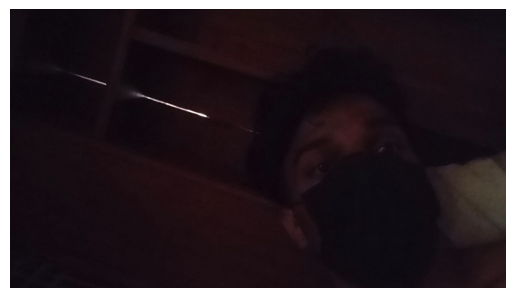

In [ ]:
import cv2
from ultralytics import YOLO
from PIL import Image
import matplotlib.pyplot as plt

# Load trained YOLO model
model = YOLO("runs/detect/train3/weights/best.pt")

# Path to test image
img_path = "/content/WhatsApp Image 2025-02-16 at 09.43.41_4e3912e0.jpg"  # Replace with actual image

# Run inference
results = model(img_path, save=True)

# Load OpenCV face detector
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

# Load image in OpenCV
image = cv2.imread(img_path)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Detect faces
faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

# If YOLO detects a mask
if results[0].boxes:
    print("✅ Mask Detected")
    detected_img = Image.open(f"runs/detect/predict5/{img_path.split('/')[-1].replace('.png', '.jpg')}")
# If no mask is detected but a face is found
elif len(faces) > 0:
    print("❌ No Mask Detected - This is an Abnormality")
    detected_img = Image.open(img_path)  # Show original image
# If no face is found
else:
    print("⚠ No Person Detected - Ignoring")
    detected_img = Image.open(img_path)  # Show original image

# Display image
plt.imshow(detected_img)
plt.axis("off")
plt.show()



image 1/1 /content/Screenshot 2025-02-16 101025.png: 352x640 (no detections), 9.4ms
Speed: 2.1ms preprocess, 9.4ms inference, 0.7ms postprocess per image at shape (1, 3, 352, 640)
Results saved to runs/detect/predict15
❌ No Mask Detected - This is an Abnormality


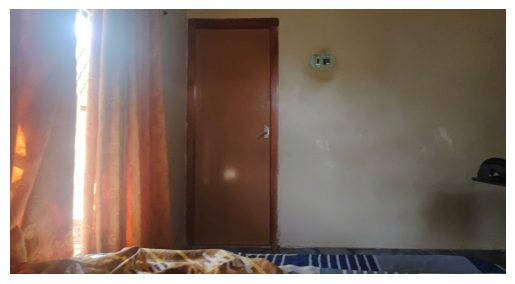

In [ ]:
import cv2
from ultralytics import YOLO
from PIL import Image
import matplotlib.pyplot as plt

# Load trained YOLO model
model = YOLO("runs/detect/train3/weights/best.pt")

# Path to test image
img_path = "/content/Screenshot 2025-02-16 101025.png"  # Replace with actual image

# Run inference
results = model(img_path, save=True)

# Load OpenCV face detector
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

# Load image in OpenCV
image = cv2.imread(img_path)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Detect faces
faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

# If YOLO detects a mask
if results[0].boxes:
    print("✅ Mask Detected")
    detected_img = Image.open(f"runs/detect/predict5/{img_path.split('/')[-1].replace('.png', '.jpg')}")
# If no mask is detected but a face is found
elif len(faces) > 0:
    print("❌ No Mask Detected - This is an Abnormality")
    detected_img = Image.open(img_path)  # Show original image
# If no face is found
else:
    print("⚠ No Person Detected - Ignoring")
    detected_img = Image.open(img_path)  # Show original image

# Display image
plt.imshow(detected_img)
plt.axis("off")
plt.show()



image 1/1 /content/Screenshot 2025-02-16 101311.png: 384x640 (no detections), 13.1ms
Speed: 3.4ms preprocess, 13.1ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/detect/predict16
⚠ No Person Detected - Ignoring


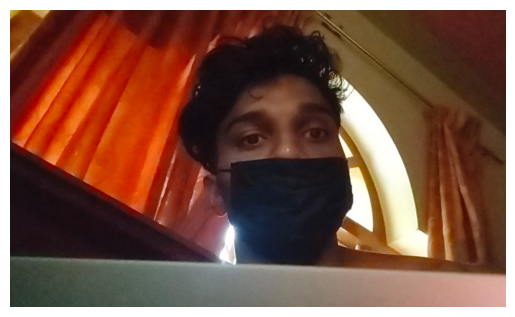

In [ ]:
import cv2
from ultralytics import YOLO
from PIL import Image
import matplotlib.pyplot as plt

# Load trained YOLO model
model = YOLO("runs/detect/train3/weights/best.pt")

# Path to test image
img_path = "/content/Screenshot 2025-02-16 101311.png"  # Replace with actual image

# Run inference
results = model(img_path, save=True)

# Load OpenCV face detector
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

# Load image in OpenCV
image = cv2.imread(img_path)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Detect faces
faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

# If YOLO detects a mask
if results[0].boxes:
    print("✅ Mask Detected")
    detected_img = Image.open(f"runs/detect/predict5/{img_path.split('/')[-1].replace('.png', '.jpg')}")
# If no mask is detected but a face is found
elif len(faces) > 0:
    print("❌ No Mask Detected - This is an Abnormality")
    detected_img = Image.open(img_path)  # Show original image
# If no face is found
else:
    print("⚠ No Person Detected - Ignoring")
    detected_img = Image.open(img_path)  # Show original image

# Display image
plt.imshow(detected_img)
plt.axis("off")
plt.show()


In [ ]:
from ultralytics import YOLO

# Load trained YOLO model
model = YOLO("runs/detect/train3/weights/best.pt")

# Test image (change this to your image file)
img_path = "/content/Screenshot 2025-02-16 101311.png"  # Replace with your actual test image

# Run inference
results = model(img_path, save=True)

# Print YOLO raw detection results
print(results)



image 1/1 /content/Screenshot 2025-02-16 101311.png: 384x640 (no detections), 25.6ms
Speed: 3.8ms preprocess, 25.6ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/detect/predict17
[ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: None
names: {0: 'face_mask'}
obb: None
orig_img: array([[[104, 202, 220],
        [ 99, 198, 219],
        [ 96, 195, 218],
        ...,
        [ 28,  32,  80],
        [ 29,  33,  81],
        [ 30,  34,  82]],

       [[102, 201, 219],
        [ 97, 196, 217],
        [ 94, 193, 216],
        ...,
        [ 27,  31,  79],
        [ 29,  33,  81],
        [ 29,  33,  81]],

       [[ 99, 199, 217],
        [ 95, 195, 215],
        [ 92, 191, 214],
        ...,
        [ 27,  31,  79],
        [ 28,  32,  80],
        [ 28,  32,  80]],

       ...,

       [[ 43,  52,  42],
        [ 43,  52,  42],
        [ 43,  52,  42],
        ...,
  

In [ ]:
from ultralytics import YOLO

# Load trained YOLO model
model = YOLO("runs/detect/train3/weights/best.pt")

# Test image (change this to your image file)
img_path = "/content/Screenshot 2025-02-16 085626.png"  # Replace with your actual test image

# Run inference
results = model(img_path, save=True)

# Print YOLO raw detection results
print(results)



image 1/1 /content/Screenshot 2025-02-16 085626.png: 640x480 1 face_mask, 10.2ms
Speed: 4.0ms preprocess, 10.2ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/detect/predict19
[ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: None
names: {0: 'face_mask'}
obb: None
orig_img: array([[[194, 202, 200],
        [194, 201, 200],
        [196, 201, 199],
        ...,
        [194, 201, 202],
        [193, 200, 201],
        [193, 200, 201]],

       [[194, 201, 200],
        [195, 203, 202],
        [196, 202, 203],
        ...,
        [194, 201, 202],
        [194, 201, 202],
        [193, 200, 200]],

       [[194, 202, 201],
        [194, 201, 201],
        [194, 202, 206],
        ...,
        [196, 203, 204],
        [193, 200, 201],
        [195, 202, 203]],

       ...,

       [[183, 180, 179],
        [186, 183, 182],
        [181, 180, 178],
        ...,
      

In [ ]:
from ultralytics import YOLO

# Load trained YOLO model
model = YOLO("runs/detect/train3/weights/best.pt")

# Path to an image without a mask
img_path = "/content/Screenshot 2025-02-16 085339.png"  # Replace with actual image

# Run inference
results = model(img_path, save=True)

# Print YOLO raw detection results
print(results)



image 1/1 /content/Screenshot 2025-02-16 085339.png: 352x640 (no detections), 11.8ms
Speed: 3.5ms preprocess, 11.8ms inference, 0.9ms postprocess per image at shape (1, 3, 352, 640)
Results saved to runs/detect/predict20
[ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: None
names: {0: 'face_mask'}
obb: None
orig_img: array([[[212, 215, 216],
        [212, 215, 217],
        [213, 216, 217],
        ...,
        [210, 211, 209],
        [210, 211, 209],
        [210, 211, 209]],

       [[213, 216, 217],
        [213, 216, 217],
        [213, 216, 217],
        ...,
        [211, 212, 210],
        [211, 212, 210],
        [211, 212, 210]],

       [[213, 216, 217],
        [213, 216, 217],
        [213, 216, 217],
        ...,
        [211, 212, 210],
        [212, 213, 211],
        [212, 213, 211]],

       ...,

       [[169, 172, 175],
        [167, 170, 173],
        [166, 168, 171],
        ...,
  


image 1/1 /content/Screenshot 2025-02-16 085339.png: 352x640 (no detections), 29.8ms
Speed: 3.1ms preprocess, 29.8ms inference, 0.8ms postprocess per image at shape (1, 3, 352, 640)
Results saved to runs/detect/predict21
❌ No Mask Detected - This is an Abnormality


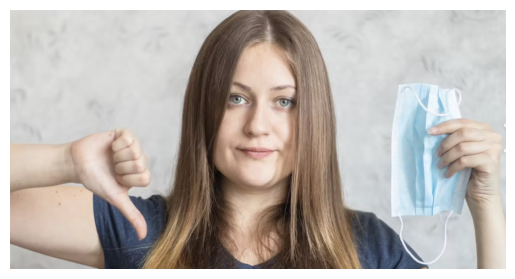

In [ ]:
import cv2
from ultralytics import YOLO
from PIL import Image
import matplotlib.pyplot as plt

# Load trained YOLO model
model = YOLO("runs/detect/train3/weights/best.pt")

# Path to test image (use an image where a person is NOT wearing a mask)
img_path = "/content/Screenshot 2025-02-16 085339.png"  # Replace with your actual test image

# Run inference with YOLO
results = model(img_path, save=True)

# Load OpenCV face detector
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

# Load image in OpenCV
image = cv2.imread(img_path)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Detect faces
faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

# If YOLO detects a mask
if results[0].boxes:
    print("✅ Mask Detected")
    detected_img = Image.open(f"runs/detect/predict20/{img_path.split('/')[-1].replace('.png', '.jpg')}")
# If no mask is detected but a face is found
elif len(faces) > 0:
    print("❌ No Mask Detected - This is an Abnormality")
    detected_img = Image.open(img_path)  # Show original image
# If no face is found
else:
    print("⚠ No Person Detected - Ignoring")
    detected_img = Image.open(img_path)  # Show original image

# Display image
plt.imshow(detected_img)
plt.axis("off")
plt.show()


In [ ]:
import os
print(sorted([f for f in os.listdir("runs/detect") if "predict" in f]))  # List all predict folders


['predict', 'predict10', 'predict11', 'predict12', 'predict13', 'predict14', 'predict15', 'predict16', 'predict17', 'predict18', 'predict19', 'predict2', 'predict20', 'predict21', 'predict22', 'predict23', 'predict24', 'predict25', 'predict26', 'predict3', 'predict4', 'predict5', 'predict6', 'predict7', 'predict8', 'predict9']


In [ ]:
import os
print(os.listdir("runs/detect/predict26"))  # List files in predict26


['Screenshot 2025-02-16 085626.jpg']


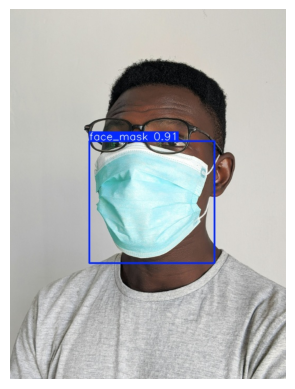

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

# Correct path to the detected image
detected_img_path = "runs/detect/predict26/Screenshot 2025-02-16 085626.jpg"  # Using correct folder

# Load and display the image
detected_img = Image.open(detected_img_path)
plt.imshow(detected_img)
plt.axis("off")  # Hide axes
plt.show()


In [ ]:
from ultralytics import YOLO

# Load trained YOLO model
model = YOLO("runs/detect/train3/weights/best.pt")

# Path to the image without a person
img_path = "/content/Screenshot 2025-02-16 101025.png"  # Your new image

# Run inference
results = model(img_path, save=True)

# Print raw YOLO results
print(results)



image 1/1 /content/Screenshot 2025-02-16 101025.png: 352x640 (no detections), 8.1ms
Speed: 2.2ms preprocess, 8.1ms inference, 0.7ms postprocess per image at shape (1, 3, 352, 640)
Results saved to runs/detect/predict27
[ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: None
names: {0: 'face_mask'}
obb: None
orig_img: array([[[151, 128, 136],
        [151, 128, 136],
        [151, 128, 136],
        ...,
        [ 45,  66,  81],
        [ 45,  66,  81],
        [ 45,  66,  81]],

       [[152, 129, 137],
        [152, 129, 137],
        [152, 129, 137],
        ...,
        [ 45,  66,  81],
        [ 45,  66,  81],
        [ 45,  66,  81]],

       [[152, 129, 137],
        [152, 129, 137],
        [152, 129, 137],
        ...,
        [ 45,  66,  81],
        [ 45,  66,  81],
        [ 45,  66,  81]],

       ...,

       [[ 30,  44,  92],
        [ 30,  45,  92],
        [ 31,  45,  92],
        ...,
    


image 1/1 /content/Screenshot 2025-02-16 101025.png: 352x640 (no detections), 33.8ms
Speed: 3.2ms preprocess, 33.8ms inference, 1.0ms postprocess per image at shape (1, 3, 352, 640)
Results saved to runs/detect/predict28
❌ No Mask Detected - This is an Abnormality


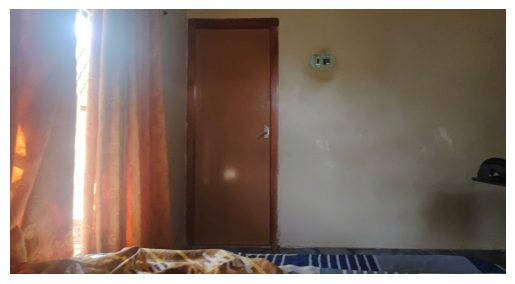

In [ ]:
import cv2
from ultralytics import YOLO
from PIL import Image
import matplotlib.pyplot as plt
import os

# Load trained YOLO model
model = YOLO("runs/detect/train3/weights/best.pt")

# Path to test image (without any person)
img_path = "/content/Screenshot 2025-02-16 101025.png"  # Replace with actual image

# Run inference with YOLO
results = model(img_path, save=True)

# Get the latest prediction folder dynamically
prediction_folder = sorted([f for f in os.listdir("runs/detect") if "predict" in f])[-1]  # Get latest 'predict' folder

# Load OpenCV face detector
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

# Load image in OpenCV
image = cv2.imread(img_path)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Detect faces
faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

# Classification Logic
if results[0].boxes:
    print("✅ Mask Detected")
    detected_img_path = f"runs/detect/{prediction_folder}/{img_path.split('/')[-1].replace('.png', '.jpg')}"
elif len(faces) > 0:
    print("❌ No Mask Detected - This is an Abnormality")
    detected_img_path = img_path  # Show original image
else:
    print("⚠ No Person Detected - Ignoring")
    detected_img_path = img_path  # Show original image

# Load and display the image
detected_img = Image.open(detected_img_path)
plt.imshow(detected_img)
plt.axis("off")
plt.show()


In [ ]:
import cv2

# Load OpenCV face detector
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

# Load the test image
img_path = "/content/Screenshot 2025-02-16 101025.png"  # Replace with your image
image = cv2.imread(img_path)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Detect faces
faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

# Print face detection results
print("Faces detected:", len(faces))


Faces detected: 1


In [ ]:
import cv2

# Load OpenCV face detector
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

# Load the test image
img_path = "/content/Screenshot 2025-02-16 101025.png"  # Replace with your image
image = cv2.imread(img_path)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Improve face detection by adjusting parameters
faces = face_cascade.detectMultiScale(gray, scaleFactor=1.2, minNeighbors=8, minSize=(50, 50))

# Print results
print("Faces detected:", len(faces))


Faces detected: 0



image 1/1 /content/Screenshot 2025-02-16 101025.png: 352x640 (no detections), 12.9ms
Speed: 3.5ms preprocess, 12.9ms inference, 1.0ms postprocess per image at shape (1, 3, 352, 640)
Results saved to runs/detect/predict29
⚠ No Person Detected - Ignoring


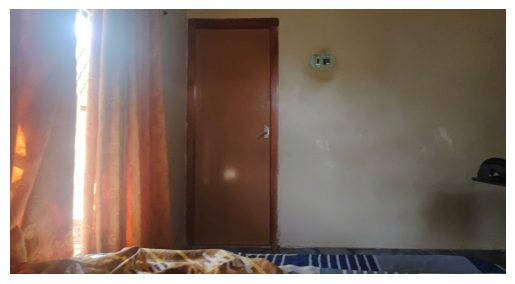

In [ ]:
import cv2
from ultralytics import YOLO
from PIL import Image
import matplotlib.pyplot as plt
import os

# Load trained YOLO model
model = YOLO("runs/detect/train3/weights/best.pt")

# Path to test image
img_path = "/content/Screenshot 2025-02-16 101025.png"  # Replace with actual image

# Run inference with YOLO
results = model(img_path, save=True)

# Get the latest prediction folder dynamically
prediction_folder = sorted([f for f in os.listdir("runs/detect") if "predict" in f])[-1]  # Get latest 'predict' folder

# Load OpenCV face detector
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

# Load image in OpenCV
image = cv2.imread(img_path)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Detect faces with improved settings
faces = face_cascade.detectMultiScale(gray, scaleFactor=1.2, minNeighbors=8, minSize=(50, 50))

# Classification Logic
if results[0].boxes:
    print("✅ Mask Detected")
    detected_img_path = f"runs/detect/{prediction_folder}/{img_path.split('/')[-1].replace('.png', '.jpg')}"
elif len(faces) > 0:
    print("❌ No Mask Detected - This is an Abnormality")
    detected_img_path = img_path  # Show original image
else:
    print("⚠ No Person Detected - Ignoring")
    detected_img_path = img_path  # Show original image

# Load and display the image
detected_img = Image.open(detected_img_path)
plt.imshow(detected_img)
plt.axis("off")
plt.show()


In [ ]:
from ultralytics import YOLO

# Load trained YOLO model
model = YOLO("runs/detect/train3/weights/best.pt")

# Path to the image with a person NOT wearing a mask
img_path = "/content/Screenshot 2025-02-16 102919.png"  # Your new image

# Run inference
results = model(img_path, save=True)

# Print YOLO detection results
print(results)



image 1/1 /content/Screenshot 2025-02-16 102919.png: 320x640 (no detections), 60.0ms
Speed: 3.1ms preprocess, 60.0ms inference, 0.9ms postprocess per image at shape (1, 3, 320, 640)
Results saved to runs/detect/predict30
[ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: None
names: {0: 'face_mask'}
obb: None
orig_img: array([[[58, 60, 65],
        [58, 60, 65],
        [58, 60, 65],
        ...,
        [58, 67, 68],
        [58, 67, 68],
        [58, 67, 68]],

       [[58, 60, 65],
        [58, 60, 65],
        [58, 60, 65],
        ...,
        [59, 67, 68],
        [59, 67, 68],
        [58, 67, 68]],

       [[58, 60, 65],
        [58, 60, 65],
        [58, 60, 66],
        ...,
        [59, 67, 69],
        [59, 67, 68],
        [59, 67, 68]],

       ...,

       [[78, 78, 74],
        [78, 78, 74],
        [79, 78, 74],
        ...,
        [97, 92, 92],
        [97, 92, 92],
        [97, 92, 92]]


image 1/1 /content/Screenshot 2025-02-16 102919.png: 320x640 (no detections), 37.1ms
Speed: 30.2ms preprocess, 37.1ms inference, 0.8ms postprocess per image at shape (1, 3, 320, 640)
Results saved to runs/detect/predict31
❌ No Mask Detected - This is an Abnormality


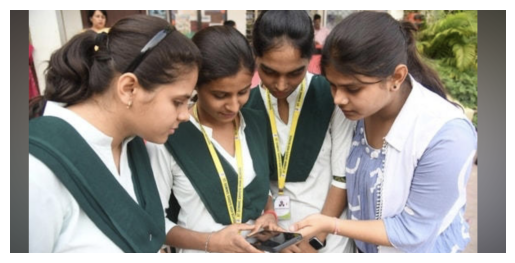

In [ ]:
import cv2
from ultralytics import YOLO
from PIL import Image
import matplotlib.pyplot as plt
import os

# Load trained YOLO model
model = YOLO("runs/detect/train3/weights/best.pt")

# Path to the test image (person without a mask)
img_path = "/content/Screenshot 2025-02-16 102919.png"  # Replace with actual image

# Run inference with YOLO
results = model(img_path, save=True)

# Get the latest prediction folder dynamically
prediction_folder = sorted([f for f in os.listdir("runs/detect") if "predict" in f])[-1]  # Get latest 'predict' folder

# Load OpenCV face detector
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

# Load image in OpenCV
image = cv2.imread(img_path)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Detect faces with improved settings
faces = face_cascade.detectMultiScale(gray, scaleFactor=1.2, minNeighbors=8, minSize=(50, 50))

# Classification Logic
if results[0].boxes:
    print("✅ Mask Detected")
    detected_img_path = f"runs/detect/{prediction_folder}/{img_path.split('/')[-1].replace('.png', '.jpg')}"
elif len(faces) > 0:
    print("❌ No Mask Detected - This is an Abnormality")
    detected_img_path = img_path  # Show original image
else:
    print("⚠ No Person Detected - Ignoring")
    detected_img_path = img_path  # Show original image

# Load and display the image
detected_img = Image.open(detected_img_path)
plt.imshow(detected_img)
plt.axis("off")
plt.show()


In [ ]:
from ultralytics import YOLO

# Load trained YOLO model
model = YOLO("runs/detect/train3/weights/best.pt")

# Path to the image with a masked person
img_path = "/content/Screenshot 2025-02-16 085626.png"  # Your test image

# Run inference
results = model(img_path, save=True)

# Print YOLO detection results
print(results)



image 1/1 /content/Screenshot 2025-02-16 085626.png: 640x480 1 face_mask, 10.7ms
Speed: 3.6ms preprocess, 10.7ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/detect/predict32
[ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: None
names: {0: 'face_mask'}
obb: None
orig_img: array([[[194, 202, 200],
        [194, 201, 200],
        [196, 201, 199],
        ...,
        [194, 201, 202],
        [193, 200, 201],
        [193, 200, 201]],

       [[194, 201, 200],
        [195, 203, 202],
        [196, 202, 203],
        ...,
        [194, 201, 202],
        [194, 201, 202],
        [193, 200, 200]],

       [[194, 202, 201],
        [194, 201, 201],
        [194, 202, 206],
        ...,
        [196, 203, 204],
        [193, 200, 201],
        [195, 202, 203]],

       ...,

       [[183, 180, 179],
        [186, 183, 182],
        [181, 180, 178],
        ...,
      

In [ ]:
import os
print(os.listdir("runs/detect/predict32"))  # List files in predict32


['Screenshot 2025-02-16 085626.jpg']


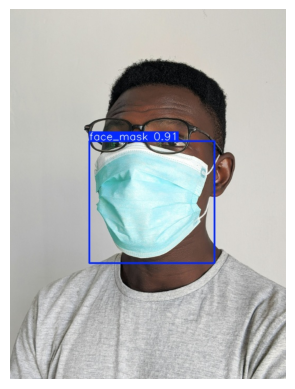

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

# Path to the detected image
detected_img_path = "runs/detect/predict32/Screenshot 2025-02-16 085626.jpg"

# Load and display the image
detected_img = Image.open(detected_img_path)
plt.imshow(detected_img)
plt.axis("off")  # Hide axes
plt.show()



Testing: /content/Screenshot 2025-02-16 085626.png

image 1/1 /content/Screenshot 2025-02-16 085626.png: 640x480 1 face_mask, 7.2ms
Speed: 3.5ms preprocess, 7.2ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/detect/predict34
✅ Mask Detected
⚠ Error: Image not found at runs/detect/predict9/Screenshot 2025-02-16 085626.jpg. Skipping display.

Testing: /content/Screenshot 2025-02-16 102919.png

image 1/1 /content/Screenshot 2025-02-16 102919.png: 320x640 (no detections), 7.9ms
Speed: 1.8ms preprocess, 7.9ms inference, 0.6ms postprocess per image at shape (1, 3, 320, 640)
Results saved to runs/detect/predict34
❌ No Mask Detected - This is an Abnormality


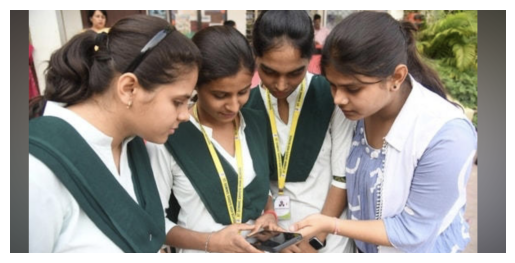


Testing: /content/Screenshot 2025-02-16 101025.png

image 1/1 /content/Screenshot 2025-02-16 101025.png: 352x640 (no detections), 9.1ms
Speed: 2.2ms preprocess, 9.1ms inference, 0.7ms postprocess per image at shape (1, 3, 352, 640)
Results saved to runs/detect/predict34
⚠ No Person Detected - Ignoring


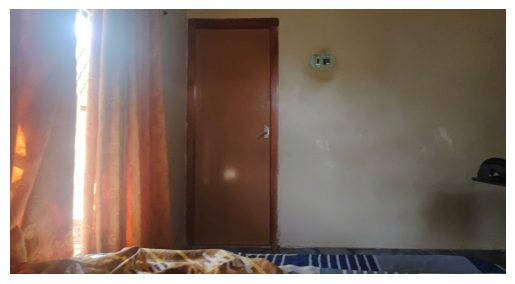

In [ ]:
import cv2
from ultralytics import YOLO
from PIL import Image
import matplotlib.pyplot as plt
import os

# Load trained YOLO model
model = YOLO("runs/detect/train3/weights/best.pt")

# Define test images (add your images here)
test_images = [
    "/content/Screenshot 2025-02-16 085626.png",  # Masked person
    "/content/Screenshot 2025-02-16 102919.png",  # Unmasked person
    "/content/Screenshot 2025-02-16 101025.png"   # No person
]

# Load OpenCV face detector
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

# Process each image
for img_path in test_images:
    print("\nTesting:", img_path)

    # Run YOLO inference
    results = model(img_path, save=True)

    # Get the latest prediction folder dynamically
    prediction_folders = sorted([f for f in os.listdir("runs/detect") if "predict" in f])
    prediction_folder = prediction_folders[-1]  # Get the latest predict folder

    # Load image in OpenCV
    image = cv2.imread(img_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Detect faces with improved settings
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.2, minNeighbors=8, minSize=(50, 50))

    # Classification Logic
    if results[0].boxes:
        print("✅ Mask Detected")
        detected_img_path = f"runs/detect/{prediction_folder}/{os.path.basename(img_path).replace('.png', '.jpg')}"
    elif len(faces) > 0:
        print("❌ No Mask Detected - This is an Abnormality")
        detected_img_path = img_path  # Show original image
    else:
        print("⚠ No Person Detected - Ignoring")
        detected_img_path = img_path  # Show original image

    # Verify if the detected image exists before displaying
    if os.path.exists(detected_img_path):
        detected_img = Image.open(detected_img_path)
        plt.imshow(detected_img)
        plt.axis("off")
        plt.show()
    else:
        print(f"⚠ Error: Image not found at {detected_img_path}. Skipping display.")



Testing: /content/Screenshot 2025-02-16 085626.png

image 1/1 /content/Screenshot 2025-02-16 085626.png: 640x480 1 face_mask, 7.2ms
Speed: 2.5ms preprocess, 7.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/detect/predict35
✅ Mask Detected
⚠ Error: Image not found at runs/detect/predict9/Screenshot 2025-02-16 085626.jpg. Trying alternative path...
⚠ Still not found: runs/detect/predict9/Screenshot 2025-02-16 085626.png. Skipping display.

Testing: /content/Screenshot 2025-02-16 102919.png

image 1/1 /content/Screenshot 2025-02-16 102919.png: 320x640 (no detections), 7.9ms
Speed: 1.8ms preprocess, 7.9ms inference, 0.6ms postprocess per image at shape (1, 3, 320, 640)
Results saved to runs/detect/predict35
❌ No Mask Detected - This is an Abnormality


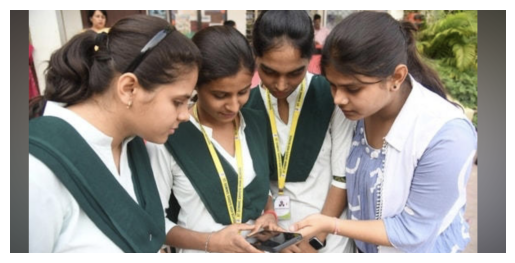


Testing: /content/Screenshot 2025-02-16 101025.png

image 1/1 /content/Screenshot 2025-02-16 101025.png: 352x640 (no detections), 17.4ms
Speed: 11.9ms preprocess, 17.4ms inference, 7.6ms postprocess per image at shape (1, 3, 352, 640)
Results saved to runs/detect/predict35
⚠ No Person Detected - Ignoring


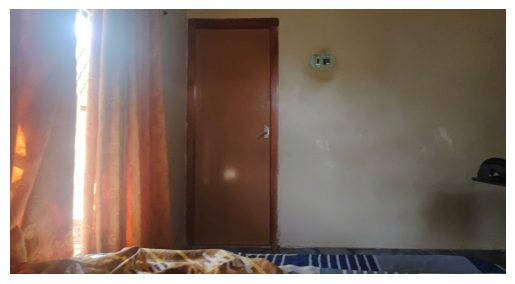

In [ ]:
import cv2
from ultralytics import YOLO
from PIL import Image
import matplotlib.pyplot as plt
import os

# Load trained YOLO model
model = YOLO("runs/detect/train3/weights/best.pt")

# Define test images
test_images = [
    "/content/Screenshot 2025-02-16 085626.png",  # Masked person
    "/content/Screenshot 2025-02-16 102919.png",  # Unmasked person
    "/content/Screenshot 2025-02-16 101025.png"   # No person
]

# Load OpenCV face detector
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

# Process each image
for img_path in test_images:
    print("\nTesting:", img_path)

    # Run YOLO inference
    results = model(img_path, save=True)

    # Get the latest prediction folder dynamically
    prediction_folders = sorted([f for f in os.listdir("runs/detect") if "predict" in f])
    prediction_folder = prediction_folders[-1]  # Get the latest predict folder

    # Load image in OpenCV
    image = cv2.imread(img_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Detect faces with improved settings
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.2, minNeighbors=8, minSize=(50, 50))

    # Classification Logic
    if results[0].boxes:
        print("✅ Mask Detected")
        detected_img_path = f"runs/detect/{prediction_folder}/{os.path.basename(img_path).replace('.png', '.jpg')}"
    elif len(faces) > 0:
        print("❌ No Mask Detected - This is an Abnormality")
        detected_img_path = img_path  # Show original image
    else:
        print("⚠ No Person Detected - Ignoring")
        detected_img_path = img_path  # Show original image

    # Verify if the detected image exists before displaying
    if os.path.exists(detected_img_path):
        detected_img = Image.open(detected_img_path)
        plt.imshow(detected_img)
        plt.axis("off")
        plt.show()
    else:
        print(f"⚠ Error: Image not found at {detected_img_path}. Trying alternative path...")

        # Try alternative path (some versions of YOLO save in different format)
        alt_path = detected_img_path.replace('.jpg', '.png')  # Check if it's saved as .png
        if os.path.exists(alt_path):
            detected_img = Image.open(alt_path)
            plt.imshow(detected_img)
            plt.axis("off")
            plt.show()
        else:
            print(f"⚠ Still not found: {alt_path}. Skipping display.")
